In [1]:
import pandas as pd
from Code.Load import Loaded_Data as ld
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import warnings

warnings.filterwarnings('ignore')
import random
import seaborn as sns
from sktime.split import temporal_train_test_split
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

Importing plotly failed. Interactive plots will not work.


In [2]:
regional_weighted_data = ld.regional_grouped_data
regional_weighted_data

w_new construction sales count  \
region  date                                         
Midwest 2018-03-31                      295.823280   
        2018-04-30                      309.734633   
        2018-05-31                      331.050077   
        2018-06-30                      352.196940   
        2018-07-31                      371.185916   
...                                            ...   
West    2023-11-30                      336.208963   
        2023-12-31                      312.261633   
        2024-01-31                      288.964338   
        2024-02-29                      276.129565   
        2024-03-31                      281.959108   

                    w_new construction mean sales price ($)  \
region  date                                                  
Midwest 2018-03-31                            296194.750461   
        2018-04-30                            298778.908939   
        2018-05-31                            307331.079589   
        2018-06-30                            318916.135013   
        2018-07-31                            318671.560627   
...                                                     ...   
West    2023-11-30                            811220.912354   
        2023-12-31                            845317.112318   
        2024-01-31                            825905.471855   
        2024-02-29                            742148.594083   
        2024-03-31                                      NaN   

                    w_mean price cut ($)  w_mean days to pending  \
region  date                                                       
Midwest 2018-03-31           8877.304381               66.941790   
        2018-04-30           8942.236815               64.528842   
        2018-05-31           8934.584046               58.602777   
        2018-06-30           8803.762074               54.243560   
        2018-07-31           9035.784483               51.757426   
...                                  ...                     ...   
West    2023-11-30          28866.070481               56.615125   
        2023-12-31          28327.934647               62.470458   
        2024-01-31          27177.702722               68.558902   
        2024-02-29          28638.596993               70.203782   
        2024-03-31          28345.222975               66.870965   

                    w_mean price cut (%)  w_median sales price ($)  \
region  date                                                         
Midwest 2018-03-31              0.044493             123934.190552   
        2018-04-30              0.042275             126365.932420   
        2018-05-31              0.041319             130408.457569   
        2018-06-30              0.040293             134162.205734   
        2018-07-31              0.041025             136994.303224   
...                                  ...                       ...   
West    2023-11-30              0.037332             469870.883243   
        2023-12-31              0.036994             461807.361693   
        2024-01-31              0.036669             459214.673048   
        2024-02-29              0.036627             452544.690083   
        2024-03-31              0.035779                       NaN   

                    w_percent sold above list (%)  w_zillow home value index  \
region  date                                                                   
Midwest 2018-03-31                       0.151650              134082.954469   
        2018-04-30                       0.163094              134941.271127   
        2018-05-31                       0.184200              135625.586813   
        2018-06-30                       0.205902              135954.934566   
        2018-07-31                       0.223626              136335.976728   
...                                           ...                        ...   
West    2023-11-30                       0.200901            

In [2]:
combined = ld.combined_data
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
date,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN
2000-01-31,395046,718,"Safford, AZ",msa,West,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97162.604619,NaN
2000-01-31,395047,233,"Saginaw, MI",msa,Midwest,MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79377.644022,NaN
2000-01-31,394392,265,"Blacksburg, VA",msa,South,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92731.513340,NaN
2000-01-31,395048,126,"Salem, OR",msa,West,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143090.338653,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395077,461,"Searcy, AR",msa,South,AR,228.0,NaN,45.0,8329.329847,0.034603,NaN,NaN,187361.749101,1109.375000
2024-03-31,395078,15,"Seattle, WA",msa,West,WA,5294.0,NaN,28.0,31175.966105,0.031918,NaN,NaN,743574.164238,2193.734523
2024-03-31,394380,232,"Bend, OR",msa,West,OR,774.0,NaN,54.0,27365.370860,0.028696,NaN,NaN,671260.138959,2262.361243


<Axes: ylabel='date'>

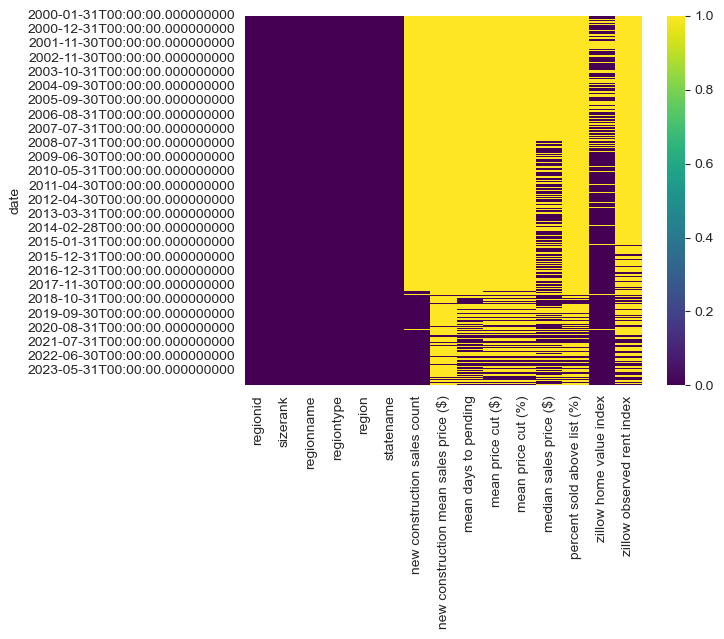

In [3]:
sns.heatmap(ld.combined_data.isnull(), cbar=True, cmap='viridis')

In [4]:
new_con_sales_price = ld.new_construction_mean_sales_price
new_con_sales_price

,regionid,sizerank,regionname,regiontype,statename,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29
0,102001,0,United States,country,NaN,4.144814e+05,3.965338e+05,4.085005e+05,4.056592e+05,4.240465e+05,...,5.340700e+05,5.433041e+05,5.377370e+05,5.435401e+05,5.441634e+05,5.528314e+05,5.398009e+05,5.482996e+05,5.418011e+05,5.340584e+05
1,394913,1,"New York, NY",msa,NY,8.180735e+05,8.395916e+05,8.536231e+05,8.901915e+05,8.855233e+05,...,1.159706e+06,1.275895e+06,1.150620e+06,1.245319e+06,1.131144e+06,1.178282e+06,1.236628e+06,1.188113e+06,1.074010e+06,1.190906e+06
2,753899,2,"Los Angeles, CA",msa,CA,1.308642e+06,1.176748e+06,1.380173e+06,1.316500e+06,1.452454e+06,...,1.902235e+06,2.003955e+06,1.869173e+06,2.000229e+06,2.162873e+06,2.011191e+06,1.793027e+06,1.795323e+06,2.004975e+06,1.784561e+06
3,394463,3,"Chicago, IL",msa,IL,5.878497e+05,5.627078e+05,4.910892e+05,6.110676e+05,6.169371e+05,...,6.214410e+05,6.107898e+05,6.100394e+05,5.712161e+05,5.894585e+05,5.811009e+05,6.624802e+05,6.232083e+05,6.188757e+05,6.224019e+05
4,394514,4,"Dallas, TX",msa,TX,3.634632e+05,3.817313e+05,3.877844e+05,3.774744e+05,4.058407e+05,...,5.085527e+05,5.104667e+05,5.069385e+05,5.180489e+05,5.222101e+05,5.005329e+05,5.074470e+05,5.066434e+05,4.907940e+05,4.786487e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,395063,522,"Sanford, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.218508e+05,3.251404e+05,3.419151e+05
168,394309,526,"Albemarle, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.699845e+05
169,845162,535,"Granbury, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.204578e+05
170,395122,576,"St. Marys, GA",msa,GA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.970484e+05,4.140215e+05,3.485341e+05,3.752479e+05,3.913863e+05,3.968337e+05,4.107808e+05


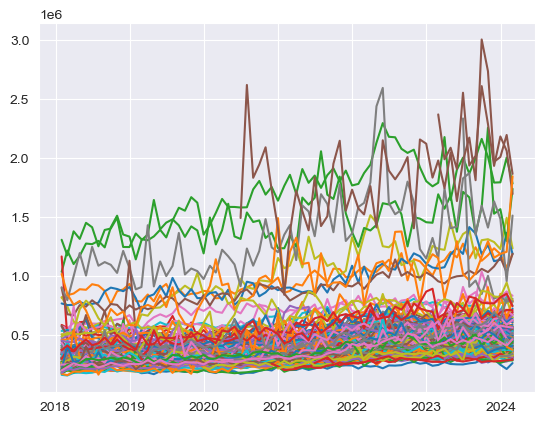

In [5]:
cities = ld.new_construction_mean_sales_price['regionname'].unique().tolist()
for city in cities:
    plt.plot(combined[combined['regionname'] == city]['new construction mean sales price ($)'], label=city)
plt.show()

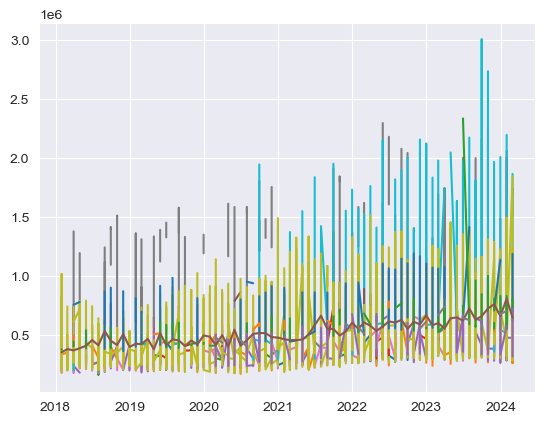

In [6]:
states = combined['statename'].unique().tolist()
for state in states:
    plt.plot(combined[combined['statename'] == state]['new construction mean sales price ($)'], label=state)
plt.show()

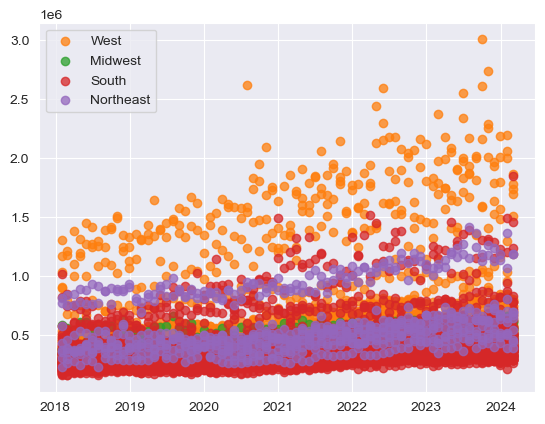

In [7]:
regions = combined['region'].unique().tolist()
for region in regions:
    plt.scatter(combined[combined['region'] == region].index,
                combined[combined['region'] == region]['new construction mean sales price ($)'], label=region,
                alpha=0.75)
plt.legend()
plt.show()

In [8]:
combined.describe()

,regionid,sizerank,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index
count,264034.000000,264034.000000,6.655300e+04,1.002400e+04,35970.000000,29001.000000,29068.000000,1.097100e+05,31023.000000,2.111790e+05,35889.000000
mean,417303.638270,463.406183,2.510082e+03,4.634309e+05,48.751626,16875.925128,0.040531,1.906284e+05,0.292654,1.760417e+05,1282.439618
std,90399.478548,269.174886,4.069910e+04,2.588003e+05,25.687137,13351.685650,0.010321,1.199198e+05,0.152387,1.165423e+05,601.771206
min,102001.000000,0.000000,4.000000e+00,1.599555e+05,7.000000,2884.733622,0.014182,3.850000e+04,0.000000,2.796741e+04,472.376387
25%,394549.000000,231.000000,1.520000e+02,3.220068e+05,29.000000,9894.904447,0.033005,1.195000e+05,0.174069,1.073233e+05,957.366409
50%,394802.000000,462.000000,3.180000e+02,3.984149e+05,44.000000,12897.923375,0.039182,1.567290e+05,0.263307,1.431134e+05,1162.028328
75%,395055.000000,693.000000,7.800000e+02,5.124273e+05,63.000000,18109.406077,0.046802,2.201670e+05,0.386173,2.038013e+05,1439.660291
max,845172.000000,939.000000,1.733387e+06,3.004595e+06,258.000000,156702.285078,0.157683,1.530000e+06,0.858032,1.671601e+06,13377.712333


In [9]:
combined['datecol'] = combined.index
combined

,regionid,sizerank,regionname,regiontype,region,statename,new construction sales count,new construction mean sales price ($),mean days to pending,mean price cut ($),mean price cut (%),median sales price ($),percent sold above list (%),zillow home value index,zillow observed rent index,datecol
date,,,,,,,,,,,,,,,,
2000-01-31,102001,0,United States,country,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121733.968492,NaN,2000-01-31
2000-01-31,395046,718,"Safford, AZ",msa,West,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97162.604619,NaN,2000-01-31
2000-01-31,395047,233,"Saginaw, MI",msa,Midwest,MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79377.644022,NaN,2000-01-31
2000-01-31,394392,265,"Blacksburg, VA",msa,South,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92731.513340,NaN,2000-01-31
2000-01-31,395048,126,"Salem, OR",msa,West,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143090.338653,NaN,2000-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,395077,461,"Searcy, AR",msa,South,AR,228.0,NaN,45.0,8329.329847,0.034603,NaN,NaN,187361.749101,1109.375000,2024-03-31
2024-03-31,395078,15,"Seattle, WA",msa,West,WA,5294.0,NaN,28.0,31175.966105,0.031918,NaN,NaN,743574.164238,2193.734523,2024-03-31
2024-03-31,394380,232,"Bend, OR",msa,West,OR,774.0,NaN,54.0,27365.370860,0.028696,NaN,NaN,671260.138959,2262.361243,2024-03-31


In [10]:
grouped_new_con = combined[['region', 'datecol', 'new construction mean sales price ($)']].dropna().groupby(
    by=['region', 'datecol']).mean()
grouped_new_con = grouped_new_con.reset_index()
grouped_new_con

,region,datecol,new construction mean sales price ($)
0,Midwest,2018-01-31,329799.577658
1,Midwest,2018-02-28,332852.537101
2,Midwest,2018-03-31,329798.658201
3,Midwest,2018-04-30,337395.488087
4,Midwest,2018-05-31,347662.763194
...,...,...,...
291,West,2023-10-31,868162.916962
292,West,2023-11-30,782149.709942
293,West,2023-12-31,809007.235843
294,West,2024-01-31,773261.579264


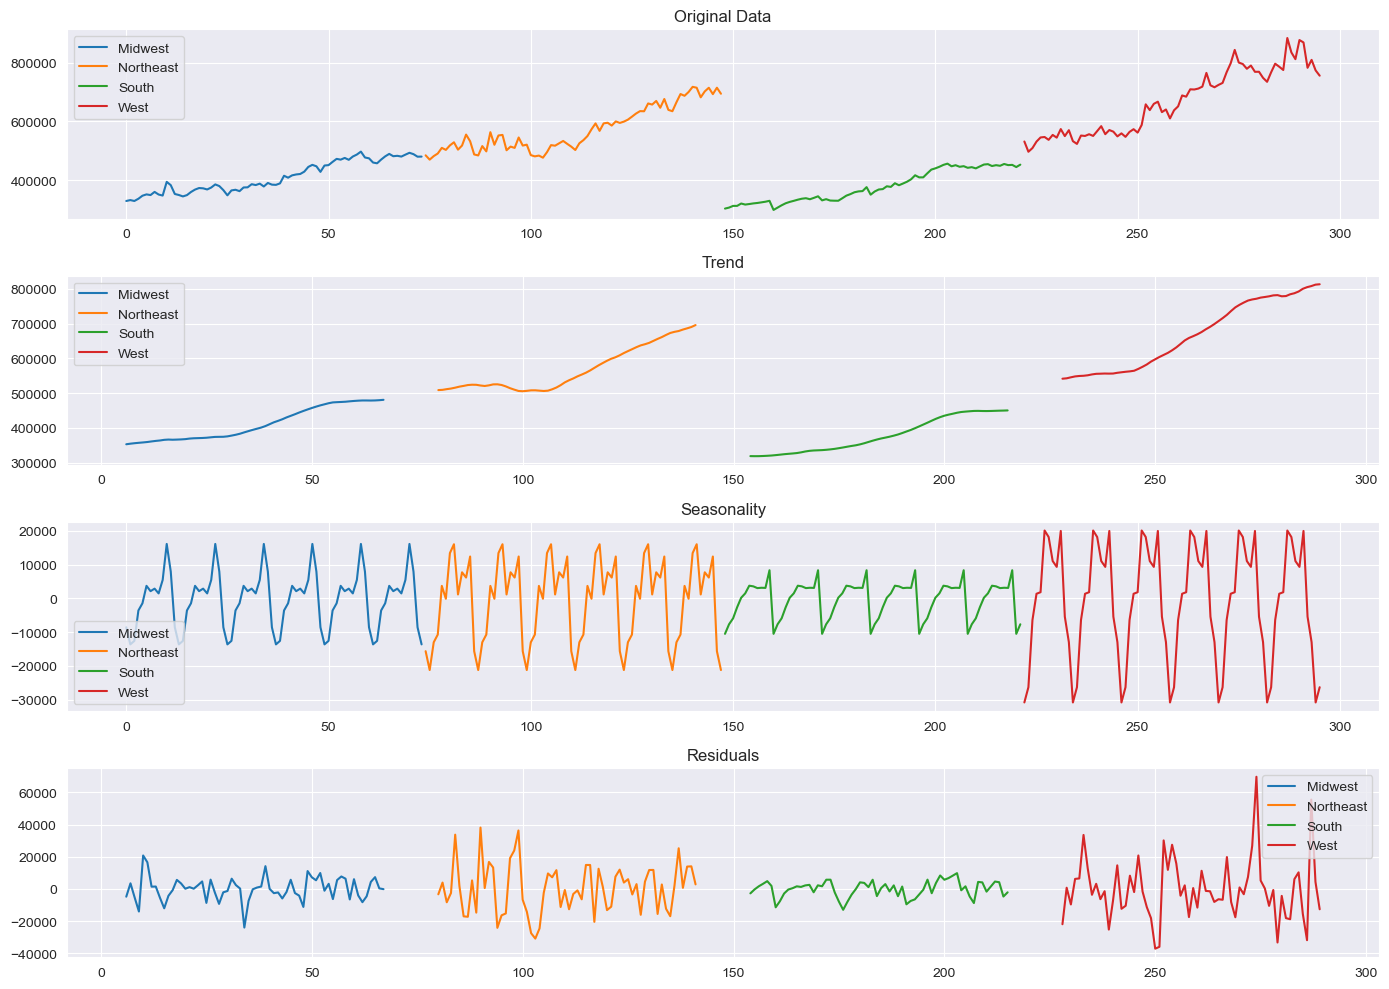

In [11]:
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(411)
ax1.set_title('Original Data')
ax2 = plt.subplot(412)
ax2.set_title('Trend')
ax3 = plt.subplot(413)
ax3.set_title('Seasonality')
ax4 = plt.subplot(414)
ax4.set_title('Residuals')
for region in grouped_new_con['region'].unique():
    region_data = grouped_new_con[grouped_new_con['region'] == region]
    decomposition = sm.tsa.seasonal_decompose(region_data['new construction mean sales price ($)'], model='additive',
                                              period=12)
    ax1.plot(region_data['new construction mean sales price ($)'], label=region)
    ax2.plot(decomposition.trend.index, decomposition.trend, label=region)
    ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label=region)
    ax4.plot(decomposition.resid.index, decomposition.resid, label=region)

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

plt.tight_layout()
plt.show()

In [12]:
def plot_acf_pacf_for_dataframe(dataframe, lags=40):
    """
    Plots ACF and PACF for each column in the dataframe.
    
    Parameters:
    - dataframe: The dataframe with time series data in each column.
    - lags: Number of lags to include in the plots.
    """

    acf_pacf_data = {}
    print(dataframe.columns)
    for column in dataframe:
        time_series = dataframe[column]

        acf_data = acf(time_series, nlags=lags)
        pacf_data = pacf(time_series, nlags=lags, method='ywm')
        acf_pacf_data[column] = (acf_data, pacf_data)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        plot_acf(time_series, lags=lags, ax=ax1)
        ax1.set_title(f'{column} - Autocorrelation Function')

        plot_pacf(time_series, lags=lags, method='ywm', ax=ax2)
        ax2.set_title(f'{column} - Partial Autocorrelation Function')

        plt.show()

    return acf_pacf_data

In [13]:
def run_stationarity_tests(dataframe, KPSS_TREND=True):
    results = []
    if KPSS_TREND:
        kp_r = 'ct'
    else:
        kp_r = 'c'
    for col in dataframe.columns:
        ts = dataframe[col]
        adf_test = adfuller(ts, autolag='AIC')
        adf_output = {
            'Test': 'ADF', 'Variable': col,
            'Test Statistic': adf_test[0],
            'p-value': adf_test[1],
            'Used Lag': adf_test[2],
            'Number of Observations': adf_test[3],
        }
        adf_output.update({f'Critical Value ({key})': value for key, value in adf_test[4].items()})
        results.append(adf_output)
        kpss_test = kpss(ts, regression=kp_r, nlags='auto')
        kpss_output = {
            'Test': 'KPSS', 'Variable': col,
            'Test Statistic': kpss_test[0],
            'p-value': kpss_test[1],
            'Used Lag': kpss_test[2],
        }
        kpss_output.update({f'Critical Value ({key})': value for key, value in kpss_test[3].items()})
        results.append(kpss_output)

    results_df = pd.DataFrame(results)

    print(
        "ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.")
    print(
        "KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).")

    return results_df

MIDWEST
Index(['new construction mean sales price ($)'], dtype='object')


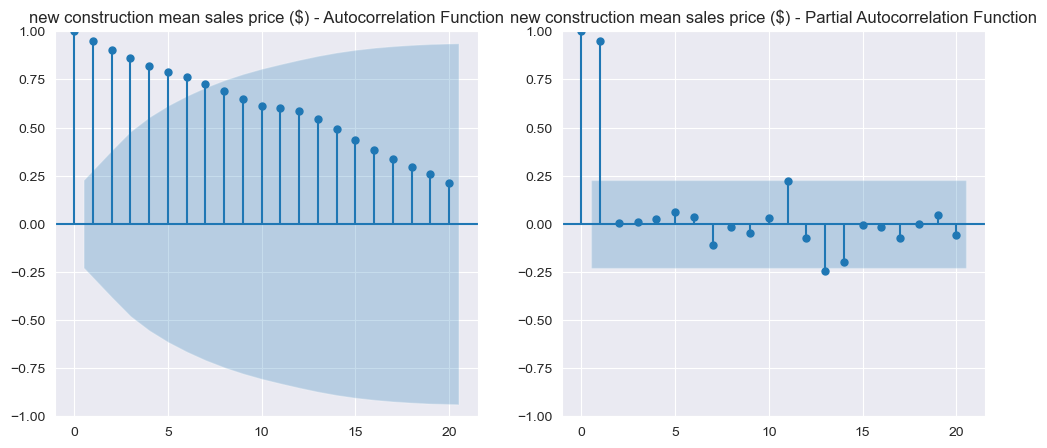

NORTHEAST
Index(['new construction mean sales price ($)'], dtype='object')


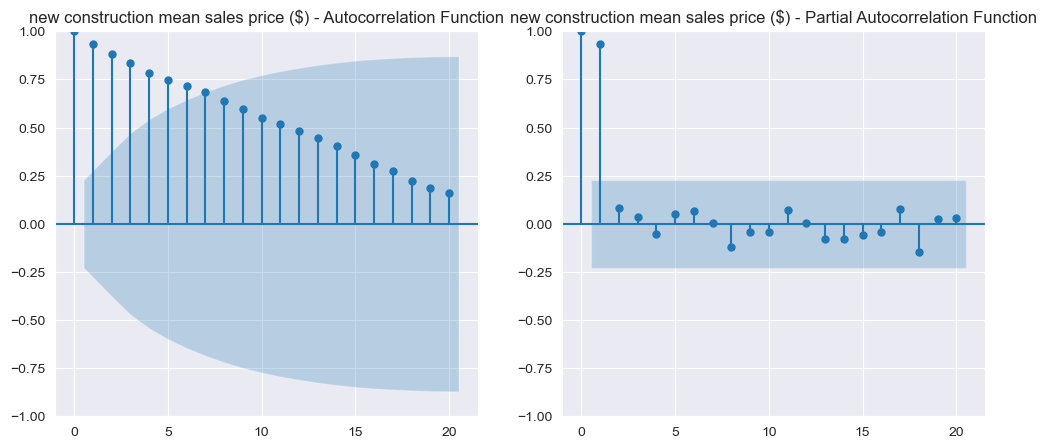

SOUTH
Index(['new construction mean sales price ($)'], dtype='object')


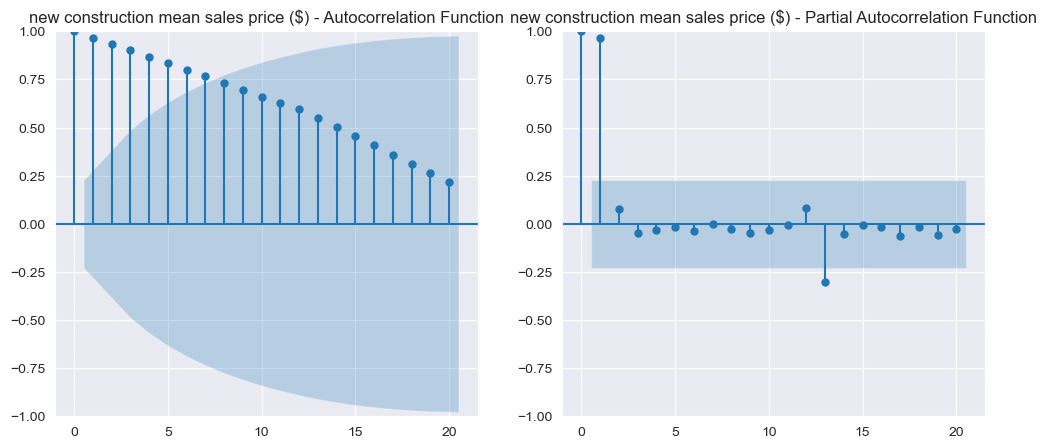

WEST
Index(['new construction mean sales price ($)'], dtype='object')


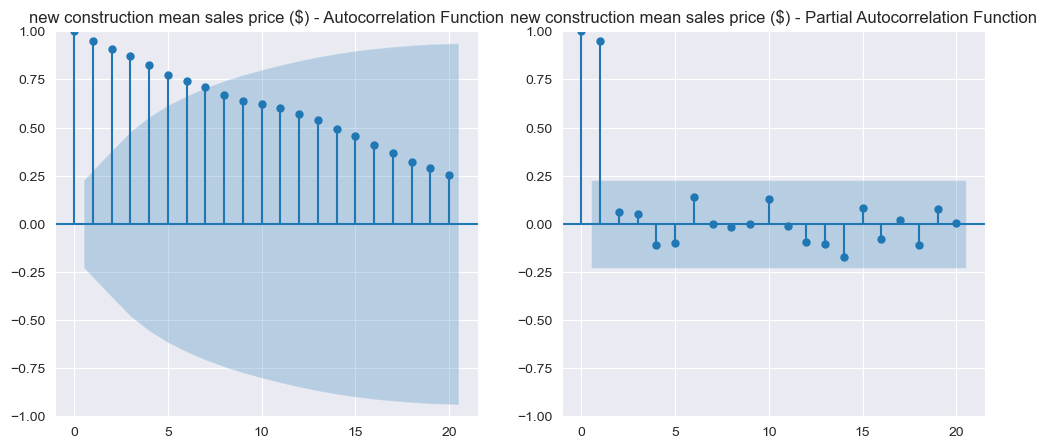

In [14]:
for region in grouped_new_con['region'].unique():
    print(str.upper(region))
    plot_acf_pacf_for_dataframe(
        pd.DataFrame(grouped_new_con[grouped_new_con['region'] == region]['new construction mean sales price ($)']),
        lags=20)

In [15]:
for region in grouped_new_con['region'].unique():
    print(str.upper(region))
    print(run_stationarity_tests(
        pd.DataFrame(grouped_new_con[grouped_new_con['region'] == region]['new construction mean sales price ($)'])))

MIDWEST
ADF Test Assumptions: The data has an autoregressive structure and the null hypothesis is that the time series is non-stationary or has a unit root.
KPSS Test Assumptions: The null hypothesis is that the time series is stationary around a trend or constant (depending on the specified regression).
   Test                               Variable  Test Statistic   p-value  \
0   ADF  new construction mean sales price ($)       -1.082280  0.722087   
1  KPSS  new construction mean sales price ($)        0.187243  0.020784   

   Used Lag  Number of Observations  Critical Value (1%)  Critical Value (5%)  \
0         0                    73.0            -3.523284            -2.902031   
1         4                     NaN             0.216000             0.146000   

   Critical Value (10%)  Critical Value (2.5%)  
0             -2.588371                    NaN  
1              0.119000                  0.176  
NORTHEAST
ADF Test Assumptions: The data has an autoregressive structure a

In [16]:

grouped_combined = combined[['region', 'datecol', 'new construction mean sales price ($)', 'median sales price ($)',
                             'new construction sales count', 'mean price cut ($)']].dropna().groupby(
    by=['region', 'datecol']).mean()
grouped_combined = grouped_combined.reset_index()
grouped_combined

,region,datecol,new construction mean sales price ($),median sales price ($),new construction sales count,mean price cut ($)
0,Midwest,2018-03-31,329798.658201,175880.500000,9117.142857,10270.619654
1,Midwest,2018-04-30,337395.488087,180857.142857,9838.285714,10624.085221
2,Midwest,2018-05-31,347662.763194,186123.714286,10740.428571,10961.517141
3,Midwest,2018-06-30,352199.334552,191458.214286,11381.714286,11082.711747
4,Midwest,2018-07-31,349907.659401,193891.714286,11921.571429,10989.246709
...,...,...,...,...,...,...
283,West,2023-10-31,868162.916962,570381.454545,3987.303030,28908.675053
284,West,2023-11-30,782149.709942,568974.666667,3916.121212,27226.211022
285,West,2023-12-31,809007.235843,562362.333333,3665.333333,25175.129652
286,West,2024-01-31,773261.579264,547828.657143,3270.828571,24044.204686


In [3]:
weighted_regional = ld.regional_grouped_data
weighted_regional

w_new construction sales count  \
region  date                                         
Midwest 2018-03-31                      295.823280   
        2018-04-30                      309.734633   
        2018-05-31                      331.050077   
        2018-06-30                      352.196940   
        2018-07-31                      371.185916   
...                                            ...   
West    2023-11-30                      336.208963   
        2023-12-31                      312.261633   
        2024-01-31                      288.964338   
        2024-02-29                      276.129565   
        2024-03-31                      281.959108   

                    w_new construction mean sales price ($)  \
region  date                                                  
Midwest 2018-03-31                            296194.750461   
        2018-04-30                            298778.908939   
        2018-05-31                            307331.079589   
        2018-06-30                            318916.135013   
        2018-07-31                            318671.560627   
...                                                     ...   
West    2023-11-30                            811220.912354   
        2023-12-31                            845317.112318   
        2024-01-31                            825905.471855   
        2024-02-29                            742148.594083   
        2024-03-31                                      NaN   

                    w_mean price cut ($)  w_mean days to pending  \
region  date                                                       
Midwest 2018-03-31           8877.304381               66.941790   
        2018-04-30           8942.236815               64.528842   
        2018-05-31           8934.584046               58.602777   
        2018-06-30           8803.762074               54.243560   
        2018-07-31           9035.784483               51.757426   
...                                  ...                     ...   
West    2023-11-30          28866.070481               56.615125   
        2023-12-31          28327.934647               62.470458   
        2024-01-31          27177.702722               68.558902   
        2024-02-29          28638.596993               70.203782   
        2024-03-31          28345.222975               66.870965   

                    w_mean price cut (%)  w_median sales price ($)  \
region  date                                                         
Midwest 2018-03-31              0.044493             123934.190552   
        2018-04-30              0.042275             126365.932420   
        2018-05-31              0.041319             130408.457569   
        2018-06-30              0.040293             134162.205734   
        2018-07-31              0.041025             136994.303224   
...                                  ...                       ...   
West    2023-11-30              0.037332             469870.883243   
        2023-12-31              0.036994             461807.361693   
        2024-01-31              0.036669             459214.673048   
        2024-02-29              0.036627             452544.690083   
        2024-03-31              0.035779                       NaN   

                    w_percent sold above list (%)  w_zillow home value index  \
region  date                                                                   
Midwest 2018-03-31                       0.151650              134082.954469   
        2018-04-30                       0.163094              134941.271127   
        2018-05-31                       0.184200              135625.586813   
        2018-06-30                       0.205902              135954.934566   
        2018-07-31                       0.223626              136335.976728   
...                                           ...                        ...   
West    2023-11-30                       0.200901            

In [4]:
weighted_regional.corr()

,w_new construction sales count,w_new construction mean sales price ($),w_mean price cut ($),w_mean days to pending,w_mean price cut (%),w_median sales price ($),w_percent sold above list (%),w_zillow home value index,w_zillow observed rent index
w_new construction sales count,1.000000,-0.178315,-0.104698,0.607224,-0.298457,-0.110987,-0.415730,-0.105151,-0.010730
w_new construction mean sales price ($),-0.178315,1.000000,0.898775,-0.406574,-0.042423,0.900599,0.384574,0.937620,0.817165
w_mean price cut ($),-0.104698,0.898775,1.000000,-0.443582,-0.044131,0.935030,0.462195,0.952900,0.928835
w_mean days to pending,0.607224,-0.406574,-0.443582,1.000000,-0.408292,-0.351428,-0.818516,-0.350044,-0.300453
w_mean price cut (%),-0.298457,-0.042423,-0.044131,-0.408292,1.000000,-0.320585,0.604286,-0.169167,-0.230827
w_median sales price ($),-0.110987,0.900599,0.935030,-0.351428,-0.320585,1.000000,0.256366,0.963089,0.935534
w_percent sold above list (%),-0.415730,0.384574,0.462195,-0.818516,0.604286,0.256366,1.000000,0.347147,0.291249
w_zillow home value index,-0.105151,0.937620,0.952900,-0.350044,-0.169167,0.963089,0.347147,1.000000,0.919967
w_zillow observed rent index,-0.010730,0.817165,0.928835,-0.300453,-0.230827,0.935534,0.291249,0.919967,1.000000
